In [1]:
import numpy as np
import pandas as pd
import seaborn
import pysal
import mapclassify
import time
import random
import seaborn
import pandas
import numpy
import matplotlib.pyplot as plt


In [2]:

pth_df = r"/Users/yuhan/Library/CloudStorage/OneDrive-UniversityofTwente/paper——revision/df_final_nogeometry_origscale.csv"
df_final_origscale = pd.read_csv( pth_df )
print( df_final_origscale.shape )
df_final_origscale['fips'] = df_final_origscale['STCOFIPS'].astype(str)

(162475, 82)


In [3]:

df_final_origscale['SBATotal'] = df_final_origscale['ApprovLoan_h'] + df_final_origscale['ApprovLoan_b']
df_final_origscale['HATotal'] = df_final_origscale['HAOAproved'] + df_final_origscale['HARAproved']

df_final_agg = df_final_origscale.groupby([ 'fips', 'Year', 'Hazard2', 'STATE', 
                                          'STATEABBRV', 'COUNTY', 'COUNTYTYPE' ]).agg({
    'HMAprojAmot' :  ['sum'], 'HMAfedShaOb':  ['sum'], 'subreciptAdm':  ['sum'],
    'srmcOblgdAmt':  ['sum'], 'AdminCostAmt':  ['sum'], 'NumfinalProp':  ['sum'], 
    'NumProperty':  ['sum'], 'CropDmg':  ['sum'],  'PropertyDmg':  ['sum'],  
    'Injuries':  ['sum'], 'Fatalities':  ['sum'], 'Count_h':  ['sum'], 
    'ApprovLoan_h':  ['sum'], 'Count_b':  ['sum'], 'ApprovLoan_b':  ['sum'], 
    'HAODamage':  ['sum'],  'HAOCount':  ['sum'], 'HAOAproved':  ['sum'],
    'HAORepaRepl':  ['sum'], 'HAORental':  ['sum'], 'HAOOther':  ['sum'], 
    'HARCount':  ['sum'], 'HARAproved':  ['sum'], 'HARRepaRepl':  ['sum'], 
    'HARRental':  ['sum'], 'HAROther':  ['sum'],  'PAprojectAmt':  ['sum'], 
       'PAfedshare':  ['sum'], 'PAtotobl':  ['sum'], 'SOVI_SCORE':  ['mean'],
        'SBATotal':  ['sum'], 'HATotal':  ['sum'] }).reset_index()

df_final_agg.columns = df_final_agg.columns.droplevel(1)

""" SBAHome_agg.rename(columns={ 'fips': 'fips', 'Year_a': 'Year_a', 'disasternumber': 'disasterNumber', 
                             'State Name': 'State Name',  'County Name': 'County Name', 
                             'Year': 'Year', 'Month': 'Month', 'incidentdate_x': 'incidentdate', 
                             'sheldusdateplace': 'sheldusdateplace', 'ApprovedLoan_h': 'ApprovLoan_h'   }, inplace=True)
 """
print( df_final_agg.Year.unique() )
print( df_final_agg.shape )

#df_final_agg.to_csv(r"/Users/yuhan/Desktop/df_fips_year.csv", index=False)
#SBAHomereader.to_csv(r"D:/FLCounty/ACS_County_2000_2019/IHPAsistance.csv", index=False)


[2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2015. 2016. 2017. 2001. 2019. 2021. 2020. 2018.]
(97702, 39)


In [4]:
df_final_agg2 = df_final_origscale.groupby([  'Year', 'Hazard2' ]).agg({
    'HMAprojAmot' :  ['sum'],   'HMAfedShaOb':  ['sum'],    'subreciptAdm':  ['sum'],
    'srmcOblgdAmt':  ['sum'],   'AdminCostAmt':  ['sum'],   'NumfinalProp':  ['sum'], 
    'NumProperty':  ['sum'],    'CropDmg':  ['sum'],        'PropertyDmg':  ['sum'],  
    'Injuries':  ['sum'],       'Fatalities':  ['sum'],     'Count_h':  ['sum'], 
    'ApprovLoan_h':  ['sum'],   'Count_b':  ['sum'],        'ApprovLoan_b':  ['sum'], 
    'HAODamage':  ['sum'],      'HAOCount':  ['sum'],       'HAOAproved':  ['sum'],
    'HAORepaRepl':  ['sum'],    'HAORental':  ['sum'],      'HAOOther':  ['sum'], 
    'HARCount':  ['sum'],       'HARAproved':  ['sum'],     'HARRepaRepl':  ['sum'], 
    'HARRental':  ['sum'],      'HAROther':  ['sum'],       'PAprojectAmt':  ['sum'], 
    'PAfedshare':  ['sum'],     'PAtotobl':  ['sum'],       'SBATotal':  ['sum'], 
    'HATotal':  ['sum'] }).reset_index()

df_final_agg2.columns = df_final_agg2.columns.droplevel(1)
""" SBAHome_agg.rename(columns={ 'fips': 'fips', 'Year_a': 'Year_a', 'disasternumber': 'disasterNumber', 
                             'State Name': 'State Name',  'County Name': 'County Name', 
                             'Year': 'Year', 'Month': 'Month', 'incidentdate_x': 'incidentdate', 
                             'sheldusdateplace': 'sheldusdateplace', 'ApprovedLoan_h': 'ApprovLoan_h'   }, inplace=True)
 """
print( df_final_agg2.Year.unique() )


[2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012.
 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021.]


In [5]:

df_PropertyDmg_agg2 = df_final_agg2.pivot_table(values= [ 'PropertyDmg'], index=['Year'],
                       columns=['Hazard2'], aggfunc=np.sum).reset_index()

df_PropertyDmg_agg2.columns = df_PropertyDmg_agg2.columns.droplevel(0)

df_PropertyDmg_agg2.to_csv(r"/Users/yuhan/Library/CloudStorage/OneDrive-UniversityofTwente/paper——revision/hazard_PropertyDmg_year.csv", index=False)


In [7]:


df_HMA_agg2 = df_final_agg2.pivot_table(values= ['HMAprojAmot'], index=['Year'],
                       columns=['Hazard2'], aggfunc=np.sum).reset_index()

df_HMA_agg2.columns = df_HMA_agg2.columns.droplevel(0)
                                                    
df_HMA_agg2.to_csv(r"/Users/yuhan/Library/CloudStorage/OneDrive-UniversityofTwente/paper——revision/hazard_HMAprojAmot_year.csv", index=False)


In [24]:


df_PA_agg2 = df_final_agg2.pivot_table(values= [ 'PAprojectAmt'], index=['Year'],
                       columns=['Hazard2'], aggfunc=np.sum).reset_index()

df_PA_agg2.columns = df_PA_agg2.columns.droplevel(0)

df_PA_agg2.to_csv(r"/Users/yuhan/Desktop/paper——revision/hazard_PAAmt_year.csv", index=False)


In [25]:

df_SBA_agg2 = df_final_agg2.pivot_table(values= [ 'SBATotal'], index=['Year'],
                       columns=['Hazard2'], aggfunc=np.sum).reset_index()
df_SBA_agg2.columns = df_SBA_agg2.columns.droplevel(0)

df_SBA_agg2.to_csv(r"/Users/yuhan/Desktop/paper——revision/hazard_SBATotal_year.csv", index=False)



In [26]:


df_HA_agg2 = df_final_agg2.pivot_table(values= [ 'HATotal'], index=['Year'],
                       columns=['Hazard2'], aggfunc=np.sum).reset_index()
df_HA_agg2.columns = df_HA_agg2.columns.droplevel(0)

df_HA_agg2.to_csv(r"/Users/yuhan/Library/CloudStorage/OneDrive-UniversityofTwente/paper——revision/hazard_HATotal_year.csv", index=False)



In [28]:
print( df_final_agg2.PropertyDmg.sum() )
print( df_final_agg2.HMAprojAmot.sum() )
print( df_final_agg2.PAprojectAmt.sum() )
print( df_final_agg2.SBATotal.sum() )
print( df_final_agg2.HATotal.sum() )


29426487441494.73
40619427144.24
2290654327053.2803
102975408475.72
1337315437894.55
1337315437894.55


In [29]:
HMA_PMD_pth = r"/Users/yuhan/Desktop/paper——revision/HMA_PMD.csv"
PDMData = pd.read_csv( HMA_PMD_pth )
PDMData['projectAmount'] = PDMData['projectAmount'].astype(float)

print( PDMData.projectAmount.sum() )



1546650946.83


In [30]:
df_final_origscale.columns

Index(['fips', 'State Name', 'County Name', 'Year', 'Month',
       'sheldusdateplace', 'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm',
       'srmcOblgdAmt', 'AdminCostAmt', 'NumfinalProp', 'NumProperty',
       'duration_years', 'duration', 'Hazard', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'disasterNumber_x', 'incidentdate_x', 'Count_h', 'ApprovLoan_h',
       'disasterNumber_y', 'incidentdate_y', 'Count_b', 'ApprovLoan_b',
       'disasterNumber', 'incidentdate', 'HAODamage', 'HAOCount', 'HAOAproved',
       'HAORepaRepl', 'HAORental', 'HAOOther', 'HARCount', 'HARAproved',
       'HARRepaRepl', 'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare',
       'PAtotobl', 'NRI_ID', 'STATE', 'STATEABBRV', 'COUNTY', 'COUNTYTYPE',
       'STCOFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVAL

In [36]:
print( df_final_origscale.loc[df_final_origscale["disasterNumber_x"] == 0].shape )
print( df_final_origscale.loc[df_final_origscale["disasterNumber_x"] != 0].shape )

df_final_origscale['totaldamg'] = df_final_origscale['PropertyDmg'] + df_final_origscale['CropDmg']
print( df_final_origscale.loc[df_final_origscale["disasterNumber_x"] == 0].totaldamg.sum() )
print( df_final_origscale.loc[df_final_origscale["disasterNumber_x"] != 0].totaldamg.sum() )

(150398, 84)
(12077, 84)
172875291559.72
29478858765080.11


In [ ]:


df_final_origscale.groupby([  'Year', 'Hazard2' ]).agg({
    'HMAprojAmot' :  ['sum'],   'HMAfedShaOb':  ['sum'],    'subreciptAdm':  ['sum'],
    'srmcOblgdAmt':  ['sum'],   'AdminCostAmt':  ['sum'],   'NumfinalProp':  ['sum'], 
    'NumProperty':  ['sum'],    'CropDmg':  ['sum'],        'PropertyDmg':  ['sum'],  
    'Injuries':  ['sum'],       'Fatalities':  ['sum'],     'Count_h':  ['sum'], 
    'ApprovLoan_h':  ['sum'],   'Count_b':  ['sum'],        'ApprovLoan_b':  ['sum'], 
    'HAODamage':  ['sum'],      'HAOCount':  ['sum'],       'HAOAproved':  ['sum'],
    'HAORepaRepl':  ['sum'],    'HAORental':  ['sum'],      'HAOOther':  ['sum'], 
    'HARCount':  ['sum'],       'HARAproved':  ['sum'],     'HARRepaRepl':  ['sum'], 
    'HARRental':  ['sum'],      'HAROther':  ['sum'],       'PAprojectAmt':  ['sum'], 
    'PAfedshare':  ['sum'],     'PAtotobl':  ['sum'],       'SBATotal':  ['sum'], 
    'HATotal':  ['sum'] }).reset_index()



In [43]:

df_final_agg2['TotalDisasterAssistance'] = df_final_agg2['HMAprojAmot'] + df_final_agg2['PAprojectAmt'] + df_final_agg2['HATotal'] + df_final_agg2['SBATotal'] 
df_final_agg2['totaldamg'] = df_final_agg2['PropertyDmg'] + df_final_agg2['CropDmg']


df_final_agg3 = df_final_agg2.groupby([  'Hazard2' ]).agg({
    'PropertyDmg'               :  ['sum'], 
    'HMAprojAmot'               :  ['sum'], 
    'PAprojectAmt'              :  ['sum'],
    'SBATotal'                  :  ['sum'],
    'HATotal'                   :  ['sum'],
    'totaldamg'                 :  ['sum'], 
    'TotalDisasterAssistance'   :  ['sum'] }).reset_index()

print( df_final_agg3.columns )

df_final_agg3.columns = df_final_agg3.columns.droplevel(1)

print( df_final_agg3 )

df_final_agg3.to_csv(r"/Users/yuhan/Desktop/paper——revision/hazard_totals.csv", index=False)


MultiIndex([(                'Hazard2',    ''),
            (            'PropertyDmg', 'sum'),
            (            'HMAprojAmot', 'sum'),
            (           'PAprojectAmt', 'sum'),
            (               'SBATotal', 'sum'),
            (                'HATotal', 'sum'),
            (              'totaldamg', 'sum'),
            ('TotalDisasterAssistance', 'sum')],
           )
                          Hazard2   PropertyDmg   HMAprojAmot  PAprojectAmt  \
0                    Drought/Heat  9.085308e+09  1.097137e+08  7.659944e+09   
1    Earthquake/Volcano/Landslide  4.538247e+10  8.534559e+07  6.673883e+07   
2                        Flooding  2.252067e+13  2.242893e+10  2.117241e+12   
3                    Other Hazard  5.288355e+08  1.340818e+07  0.000000e+00   
4  Severe Storm/Hurricane/Tornado  6.040882e+12  1.203953e+10  1.407072e+11   
5            Severe/Thunder Storm  4.710576e+10  1.213781e+09  6.390509e+08   
6                        Wildfire  1.882934e+11  

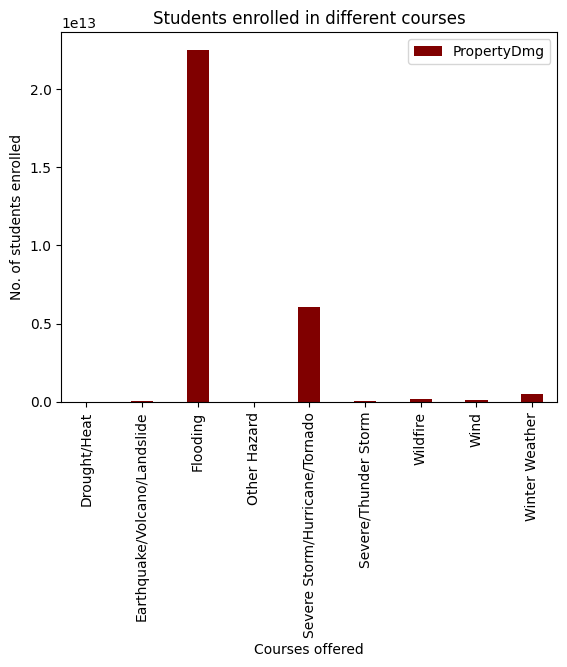

In [42]:
df_final_agg3.plot.bar( x = 'Hazard2', y = 'PropertyDmg', color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()